## visualization of degree metrics (network topology metrics)

- source: https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html



In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os

# for Notebook
%matplotlib inline

In [7]:
# make a directory to save the plots/figures
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_topology_examples/"
os.makedirs(figpath, exist_ok=True)

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=675)

In [4]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])
dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

## dgree centrality

Degree of a node is basically number of edges that it has. The basic intuition is that, nodes with more connections are more influential and important in a network. In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.

For directed graphs, in-degree, number of incoming points, is considered as importance factor for nodes.



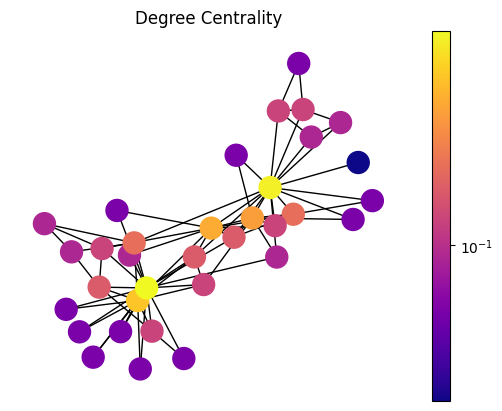

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
fig.savefig(figpath + "degree_centrality.pdf")
fig.savefig(figpath + "degree_centrality.png")

### Eigenvector Centrality

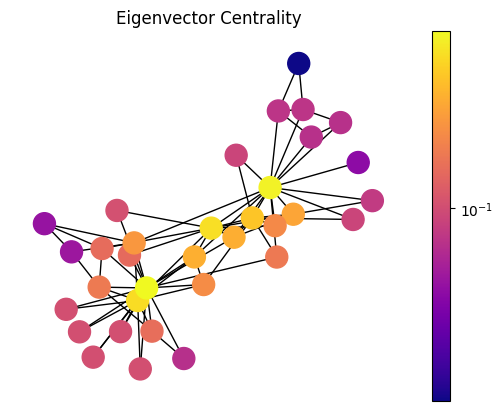

In [13]:
fig = plt.figure()
draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
fig.savefig(figpath + "degree_eigenvector_centrality.pdf")
fig.savefig(figpath + "degree_eigenvector_centrality.png")

## Other degree centrality metrics

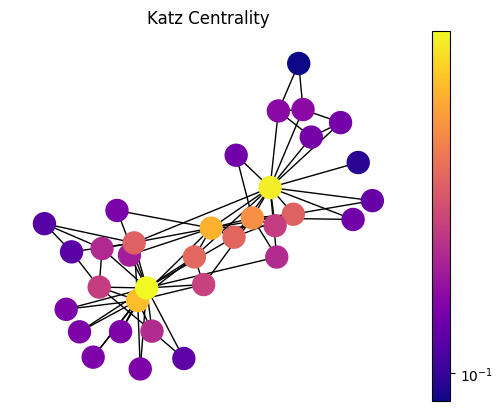

In [15]:
# Katz centrality
fig = plt.figure()
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality')
fig.savefig(figpath + "katz_centrality.pdf")
fig.savefig(figpath + "katz_centrality.png")

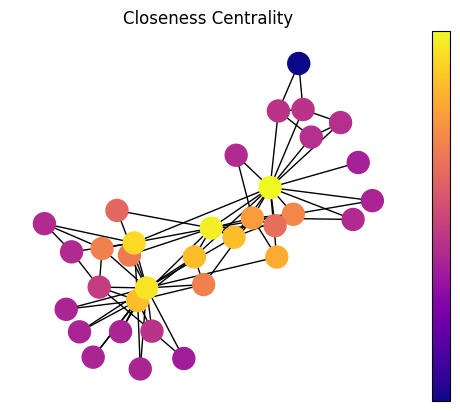

In [14]:
# closeness centrality
fig = plt.figure()
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
fig.savefig(figpath + "closeness_centrality.pdf")
fig.savefig(figpath + "closeness_centrality.png")

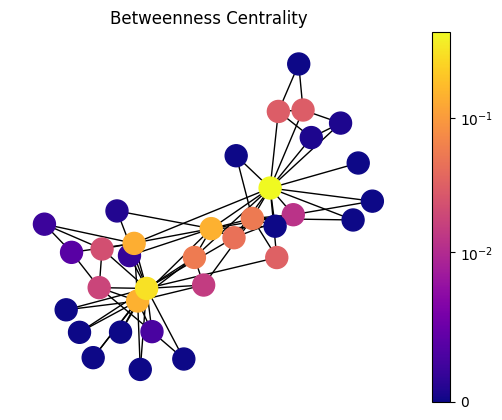

In [16]:
# betweenness centrality
fig = plt.figure()
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')
fig.savefig(figpath + "betweenness_centrality.pdf")
fig.savefig(figpath + "betweenness_centrality.png")